#### Data Loading: Brief overview of the dataset and its properties

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# File path to the data
file_path = 'supermarket_sales - Sheet1.xlsx'

# Storing the dataset into a dataframe
supermarket = pd.read_excel(file_path)  

# Reading the first 5 rows of the dataset
supermarket.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-05-01 00:00:00,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-08-03 00:00:00,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03 00:00:00,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-08-02 00:00:00,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [2]:
# Reading the last 5 rows of the dataset
supermarket.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-02-03 00:00:00,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-09-02 00:00:00,13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33:00,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28:00,Cash,618.38,4.761905,30.9190,6.6


In [3]:
# Checking the shape of the dataset
supermarket.shape

(1000, 17)

In [4]:
# Checking for the columns of the datset
supermarket.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [5]:
# Getting the information of the dataset
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
# Displaying all the column names of the dataset
from tabulate import tabulate
column_names = supermarket.columns.tolist()
# Convert all the column names to a list
column_names_table = [[i+1, name] for i, name in enumerate(column_names)]
print(tabulate(column_names_table, headers=["Index", "Column Name"]))   


  Index  Column Name
-------  -----------------------
      1  Invoice ID
      2  Branch
      3  City
      4  Customer type
      5  Gender
      6  Product line
      7  Unit price
      8  Quantity
      9  Tax 5%
     10  Total
     11  Date
     12  Time
     13  Payment
     14  cogs
     15  gross margin percentage
     16  gross income
     17  Rating


#### Data Cleaning: Taking care of missing values, duplicates and outliers

In [7]:
# Separating numeric and non-numeric columns
numeric = supermarket.select_dtypes(include = ['number'])
non_numeric = supermarket.select_dtypes(exclude = ['int, float'])

print('numeric columns:', numeric.columns)
print('non_numeric columns:', non_numeric.columns)

numeric columns: Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')
non_numeric columns: Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


In [8]:
# Checking for missing values
supermarket.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [9]:
# Checking for duplicates in the dataset
supermarket.duplicated().sum()

0

In [10]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=['float', 'int']).columns:  # Only consider numeric columns
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count the number of outliers in each column
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)

    return pd.Series(outlier_counts, name='Number of Outliers')

# Apply the function to detect outliers and display the output
outliers = detect_outliers_iqr(supermarket)
print("Number of Outliers in Each Column:\n", outliers)

Number of Outliers in Each Column:
 Unit price                 0
Quantity                   0
Tax 5%                     9
Total                      9
cogs                       9
gross margin percentage    0
gross income               9
Rating                     0
Name: Number of Outliers, dtype: int64


In [11]:
# Removing outliers using the IQR method

def remove_outliers(df, columns):
    # Removing outliers using the IQR method for the specified columns
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Columns to check for outliers
num_columns = ['Unit price', 'Quantity', 'Total', 'Rating', 'gross income']

# Remove outliers from the dataset
supermarket_cleaned = remove_outliers(supermarket, num_columns)

# Display the shape of the cleaned dataset
supermarket_cleaned.shape


(991, 17)

##### Explanatory data analysis

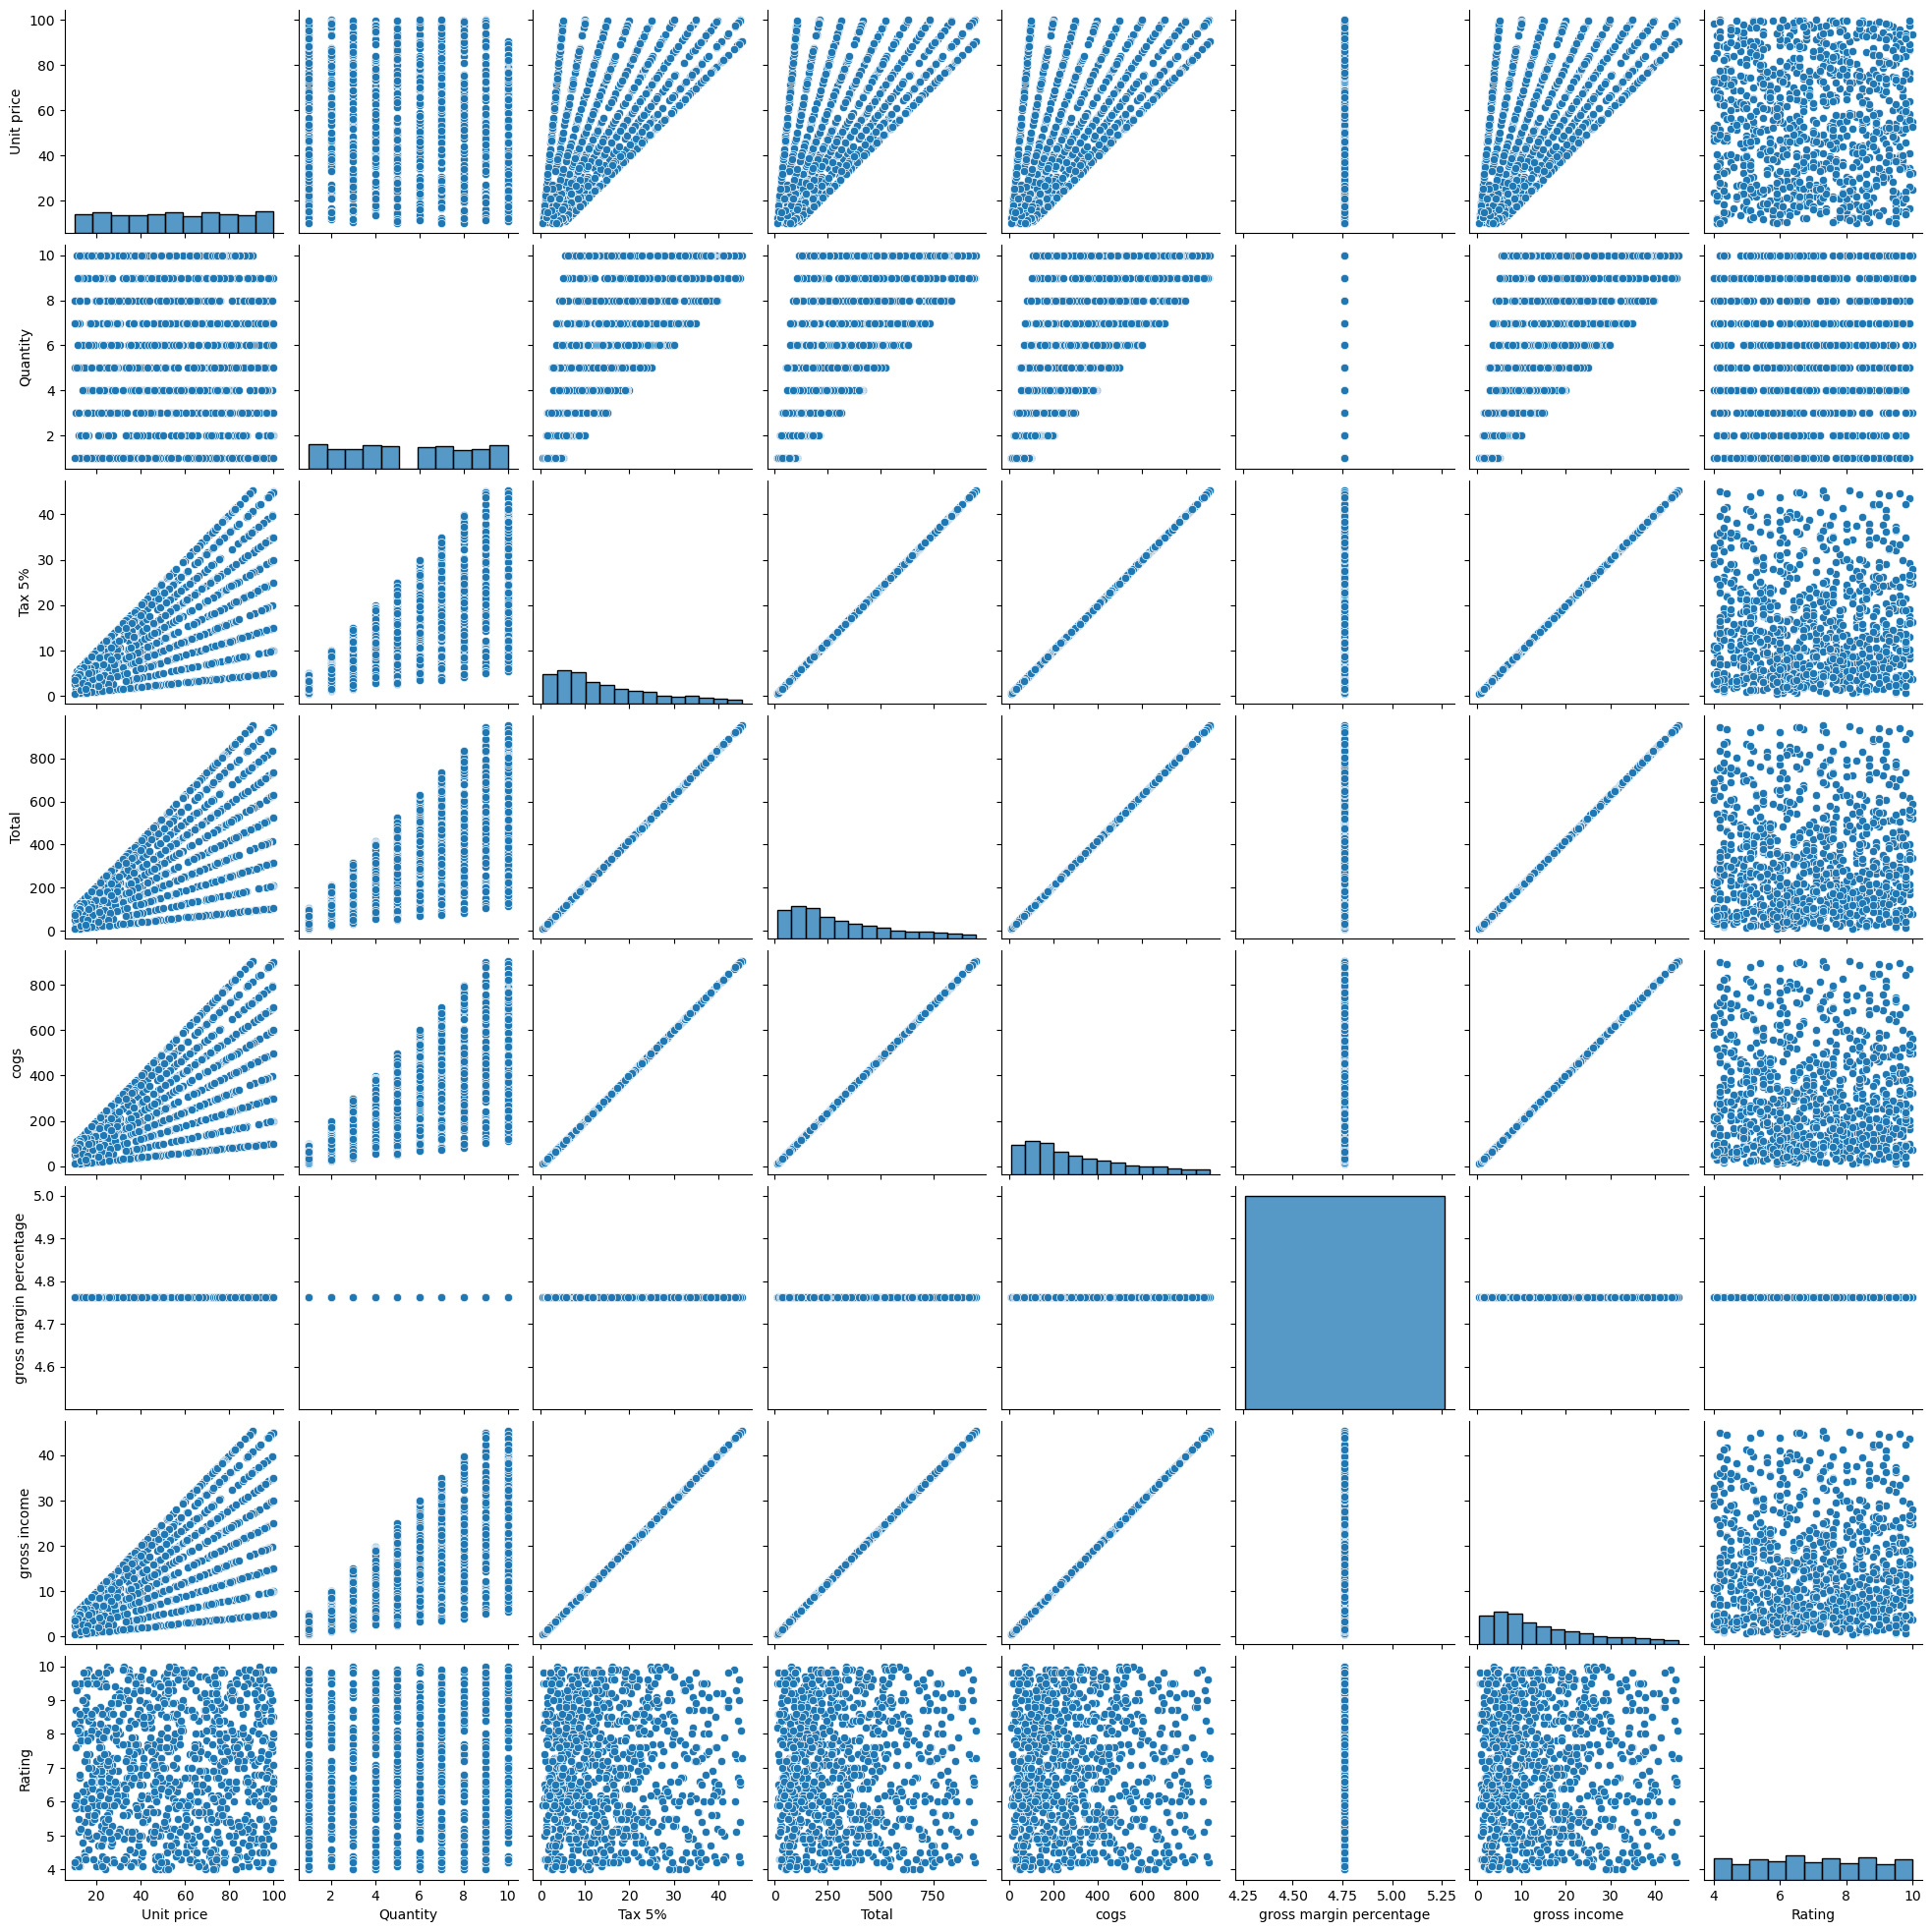

In [12]:
# Plotting pairplots for the numeric columns
sns.pairplot(supermarket_cleaned)
plt.show()

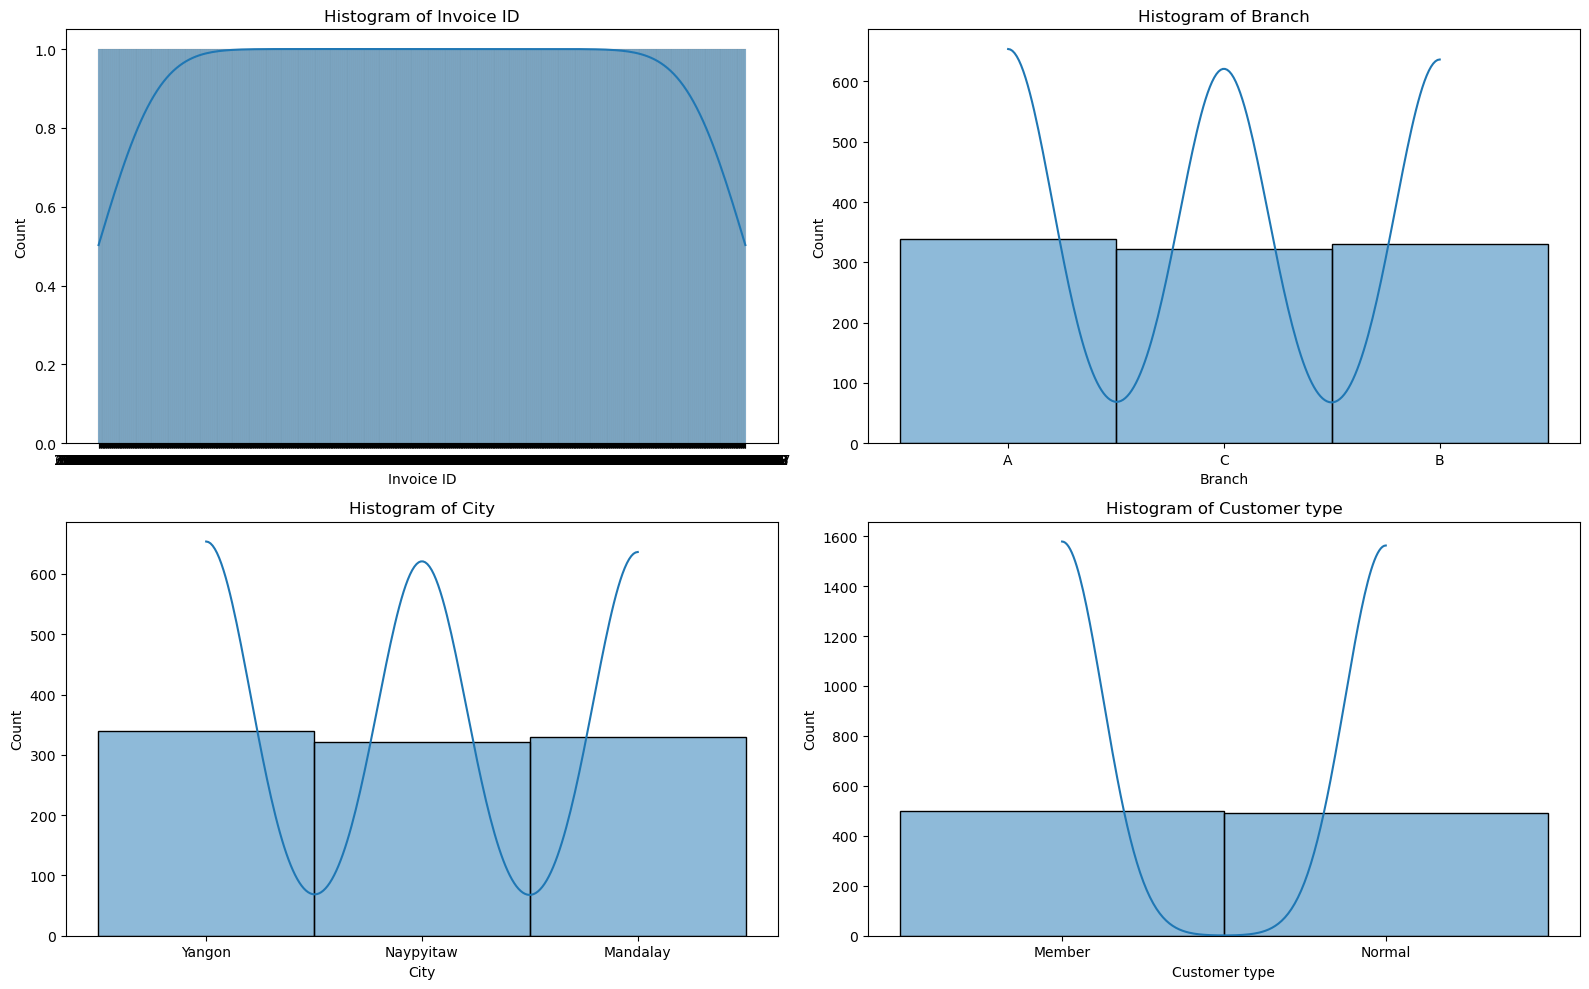

In [13]:
# Plot histograms for each numeric column
numeric_columns = supermarket_cleaned.columns
plt.figure(figsize=(16, 10))
for i, column in enumerate(numeric_columns, 1):
    if i <= 4:  # Plot only first 4 pairwise histograms
        plt.subplot(2, 2, i)
        sns.histplot(supermarket_cleaned[column], kde=True)
        plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

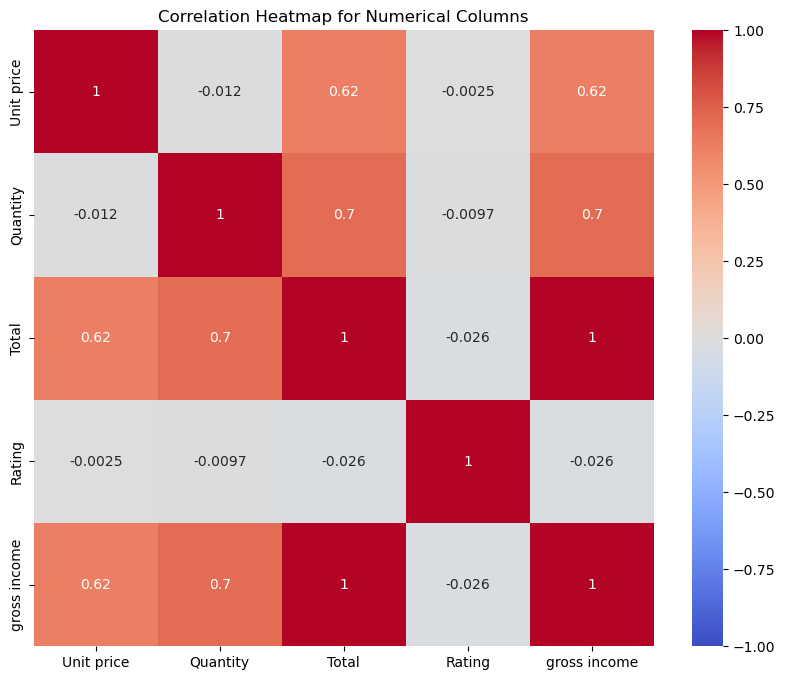

In [14]:
# Calculate correlation matrix for numerical columns
correlation_matrix = supermarket_cleaned[num_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

The goal is to group customers into clusters based on their purchasing behavior, using the numerical features available in the dataset. 

In [17]:
pip install scikit-learn-extra


  Using cached scikit_learn_extra-0.3.0-cp312-cp312-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
# Data preprocessing

# Select numerical features for clustering
numerical_cols = supermarket_cleaned.select_dtypes(include=['number']).columns
X = supermarket_cleaned[numerical_cols]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


##### K-means clustering

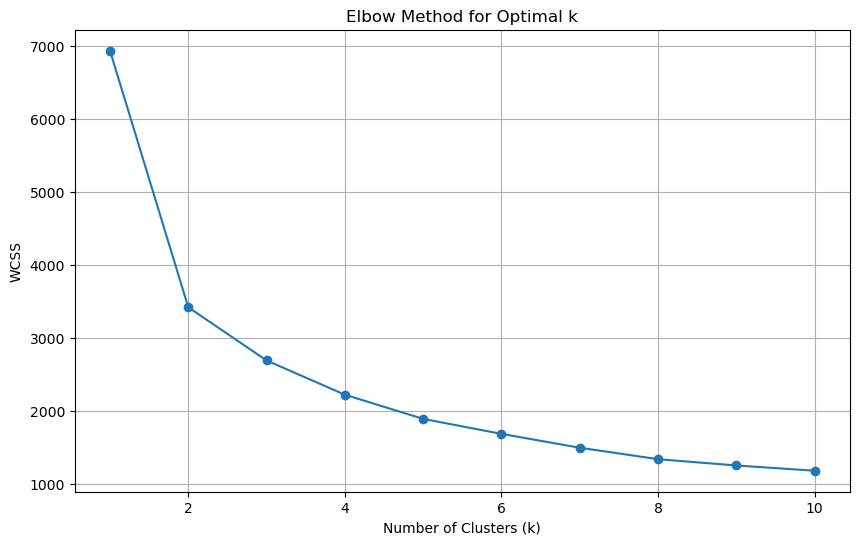

K-Means Silhouette Score: 0.30621562643649297


In [20]:
#  Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

#  Fit the K-Means model with the optimal number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Evaluate K-Means clustering
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
print(f"K-Means Silhouette Score: {silhouette_kmeans}")


##### K- Medoids clustering

In [21]:
# Step 1: Fit the K-Medoids model with the optimal number of clusters (e.g., k=3)
kmedoids = KMedoids(n_clusters=3, random_state=42, method='pam')
kmedoids_labels = kmedoids.fit_predict(X_scaled)

# Step 2: Evaluate K-Medoids clustering
silhouette_kmedoids = silhouette_score(X_scaled, kmedoids_labels)
print(f"K-Medoids Silhouette Score: {silhouette_kmedoids}")


K-Medoids Silhouette Score: 0.2932764024547079


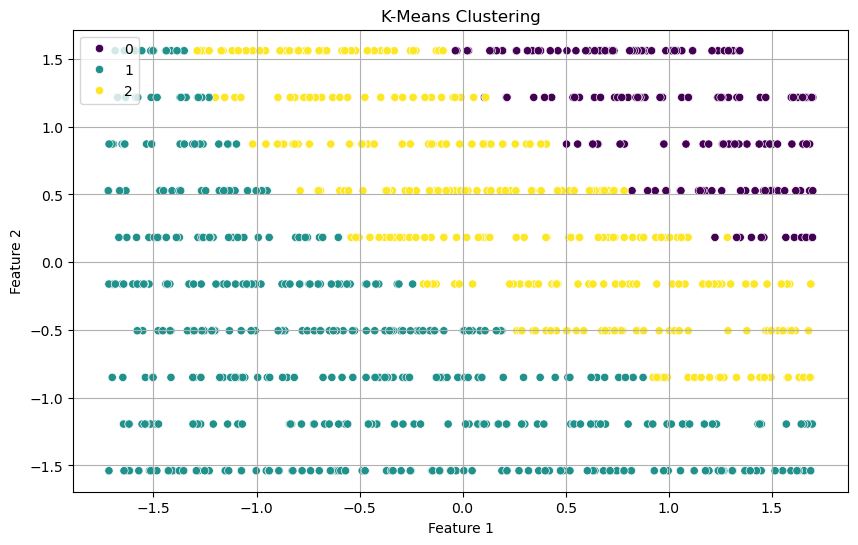

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


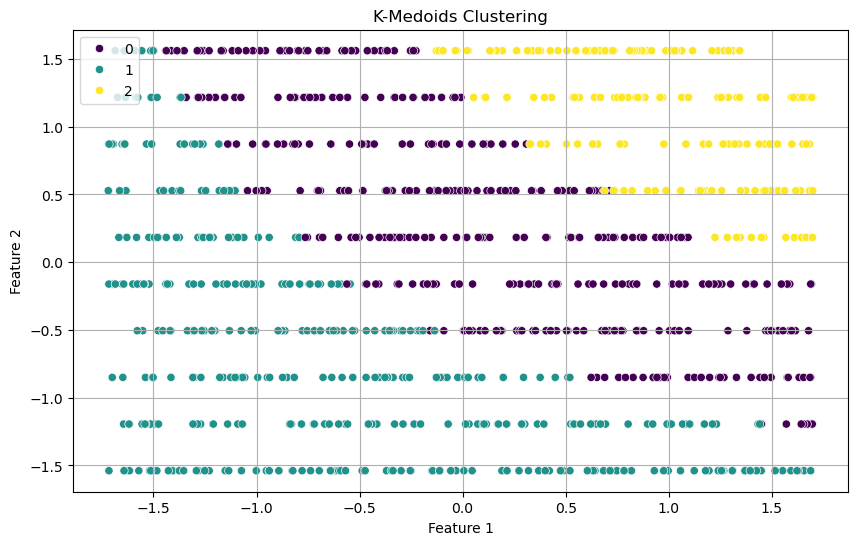

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmedoids_labels, palette='viridis')
plt.title('K-Medoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


##### Segment 1 (Occasional Buyers) primarily drives sales volume but contributes less to revenue.
##### Segment 2 (Regular Shoppers) maintains consistent sales and represents the core customer base.
##### Segment 3 (High-Value Shoppers), though smaller in number, significantly impacts revenue and offers potential for premium service offerings.